In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
unique_user = ratings.userId.nunique(dropna = True)
unique_movie = ratings.movieId.nunique(dropna = True)
print("number of unique user:")
print(unique_user)
print("number of unique movies:")
print(unique_movie)

number of unique user:
7120
number of unique movies:
14026


In [6]:
# for creating item user matrix  .. we need to check how many ratings we have here or how many are absent .
total_ratings = unique_user*unique_movie
rating_present = ratings.shape[0]

ratings_not_provided = total_ratings - rating_present 

print("ratings not provided means some user have not watched some movies and its given by")
print(ratings_not_provided)
print("sparsity of user-item matrix is :")
print(ratings_not_provided / total_ratings)

ratings not provided means some user have not watched some movies and its given by
98816545
sparsity of user-item matrix is :
0.9895000877183144


# data exploration :
1) plot ratings count which gives information about which rating(on scale of 0 t0 5) is more frequent
2) plot rating frequency of each movie(how many time a movie has been rated)



In [7]:

rating_cnt = pd.DataFrame(ratings.groupby('rating').size(),columns=['count'])
rating_cnt


rating_cnt = rating_cnt.append(pd.DataFrame({'count':ratings_not_provided},index = [0])).sort_index()
rating_cnt

#since the count of rating 0 is too large in comparison to others rating ...use lag value
rating_cnt['log_count'] = np.log(rating_cnt['count'])
rating_cnt

,count,log_count
0.0,98816545,18.408776
0.5,13232,9.490393
1.0,35144,10.467209
1.5,14029,9.548882
2.0,74706,11.221316
2.5,44791,10.709763
3.0,226202,12.329184
3.5,112926,11.634488
4.0,295135,12.595188
4.5,79848,11.287880


frequency of rating like 3 and 4 are more in compare to other ratings


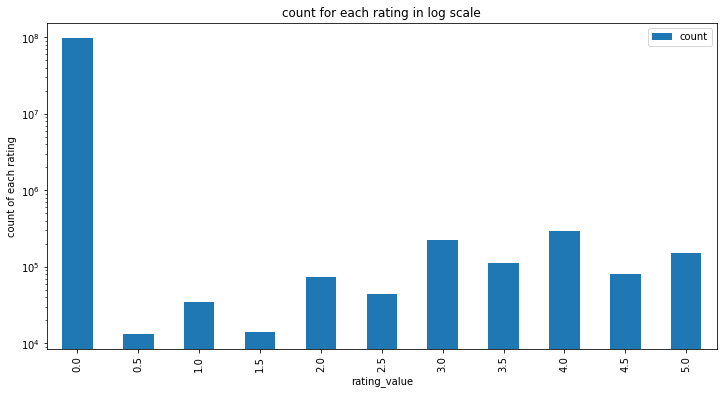

In [8]:
# plot a bar plot to visualise the ratings
rating_cnt_for_vis = rating_cnt
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating in log scale',
    figsize=(12,6)
)
ax.set_xlabel('rating_value')
ax.set_ylabel('count of each rating')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

In [9]:

movie_freq = pd.DataFrame(ratings.groupby('movieId').size(),columns=['count'])
movie_freq.head()

,count
movieId,
1,2569
2,1155
3,685
4,138
5,657


Text(0, 0.5, 'rating freq of movies')

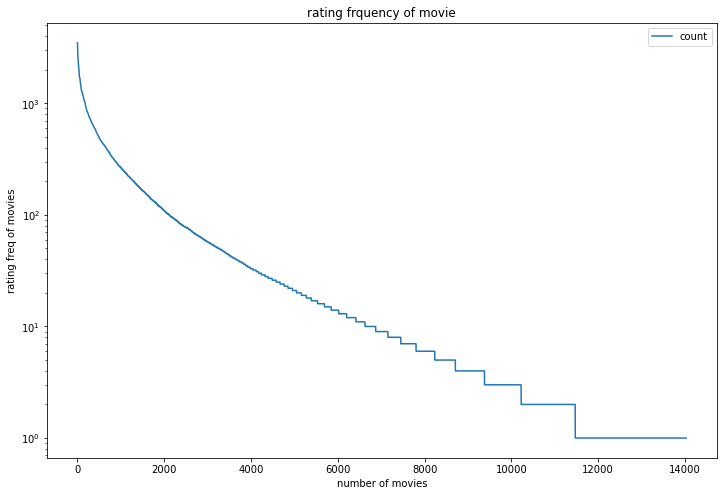

In [10]:
# plot movie rating freq
movie_freq_copy = movie_freq.sort_values(by='count',ascending=False)
movie_freq_copy=movie_freq_copy.reset_index(drop=True)

ax1  = movie_freq_copy.plot(
    title='rating frquency of movie',
    logy=True,
    figsize=(12,8)
)
ax1.set_xlabel('number of movies')
ax1.set_ylabel('rating freq of movies')

In [11]:
# we can see that most of the movies are rated very rarely ..
# so we can remove those movies which are rated less than 50 times.

threshold_rating_freq = 10


popular_movies_id = list(set(movie_freq.query('count>=@threshold_rating_freq').index))

# ratings df after dropping non popular movies
ratings_with_popular_movies = ratings[ratings.movieId.isin(popular_movies_id)]

print('shape of ratings:')
print(ratings.shape)

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print("no of movies which are rated more than 50 times:")
print(len(popular_movies_id))


print("no of unique movies present in dataset:")
print(unique_movie)

shape of ratings:
(1048575, 4)
shape of ratings_with_popular_movies:
(1025973, 4)
no of movies which are rated more than 50 times:
6870
no of unique movies present in dataset:
14026


In [12]:
user_cnt = pd.DataFrame(ratings.groupby('userId').size(),columns=['count'])
user_cnt_copy = user_cnt
user_cnt.head()

,count
userId,
1,175
2,61
3,187
4,28
5,66


Text(0, 0.5, 'rating frequency')

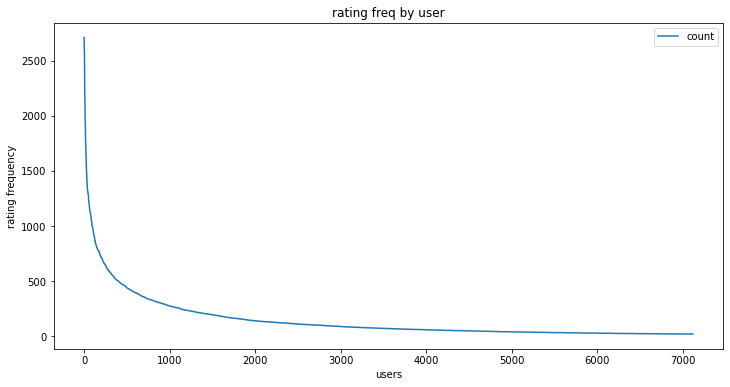

In [13]:
# plot rating freq
ax  = user_cnt_copy.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by user',
      figsize=(12,6),
      
)
ax.set_xlabel("users")
ax.set_ylabel("rating frequency")

In [14]:

threshold_val = 30
active_user = list(set(user_cnt.query('count>=@threshold_val').index))

#upadte your ratings_with_popular_movies
ratings_with_popular_movies_with_active_user = ratings_with_popular_movies[ratings_with_popular_movies.userId.isin(active_user)]

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print('shape of ratings_with_popular_movies_with_active_user:')
print(ratings_with_popular_movies_with_active_user.shape)

print("unique_user:")
print(unique_user)

print("active_user")
print(len(active_user))

print("unique_movies")
print(unique_movie)

print("popular_movies")
print(len(popular_movies_id))

shape of ratings_with_popular_movies:
(1025973, 4)
shape of ratings_with_popular_movies_with_active_user:
(994492, 4)
unique_user:
7120
active_user
5786
unique_movies
14026
popular_movies
6870


shape of ratings_with_popular_movies:
(81116, 4)
shape of ratings_with_popular_movies_with_active_user:
(78712, 4)
unique_user:
610
active_user
501
unique_movies
9724
popular_movies
2269

So you can see that we have reduce significant number of user and movies in our dataset but shape of rating dataset doesnt change in that order because we are cosidering only movies that are rated more than threshold and user that do give ratings more than threshold value.
this is necessary due to following reasono:
1) it reduces the sparsity.
2) as we are going to use KNN algorithm for recommendation ,we are going to affected by "curse of dimensionality".
   KNN doesnt work properly in case of large nunber of dimension.
3) 

# building the KNN model
here we are going to use an unsupervised learning algorithm known as NearestNeibhours. so we have to reshape/prepare our dataset into a format which can be given as parameter. we will pivot our final dataset into a ITEM-USER matrix and empty cell with 0.( because KNN model calculates distance between two points. )

In [15]:
final_ratings = ratings_with_popular_movies_with_active_user
item_user_mat = final_ratings.pivot(index='movieId',columns = 'userId',values='rating').fillna(0)

In [16]:
movie_to_index = {
    movie:i for i,movie in enumerate(list(movies.set_index('movieId').loc[item_user_mat.index].title))
}


In [18]:
# create a sparse matrix for more efficient calculations
from scipy.sparse import csr_matrix
item_user_mat_sparse = csr_matrix(item_user_mat.values)

# Now when a movie name is given as input we need to find that any such movie present in our dataset or not.


In [19]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [20]:
# fuzzy_movie_name_matching
from fuzzywuzzy import fuzz

def fuzzy_movie_name_matching (input_str,mapper,print_matches):
    # match_movie is list of tuple of 3 values(movie_name,index,fuzz_ratio)
    match_movie = []
    for movie,ind in mapper.items():
        current_ratio = fuzz.ratio(movie.lower(),input_str.lower())
        if(current_ratio>=50):
            match_movie.append((movie,ind,current_ratio))
     
    # sort the match_movie with respect to ratio 

    match_movie = sorted(match_movie,key =lambda x:x[2])[::-1]
    
    if len(match_movie)==0:
        print("Oops..! no such movie is present here\n")
        return -1
    if print_matches == True:
        print("some matching of input_str are\n")
        for title,ind,ratio in match_movie:
            print(title,ind,'\n')
     
        
    return match_movie[0][1]    
     
   

/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [23]:
# define the model
from sklearn.neighbors import NearestNeighbors
recommendation_model = NearestNeighbors(metric='cosine',algorithm = 'brute',n_neighbors=20,n_jobs=-1)

In [24]:
# create a function which takes a movie name and make recommedation for it
def make_recommendation(input_str,data,model,mapper,n_recommendation):
    print("In process of getting Your Recommendations....\n")
    model.fit(data)
    
    index = fuzzy_movie_name_matching (input_str,mapper,print_matches = False)
    
    if index==-1 :
        print("pls enter a valid movie name\n")
        return 
    
    index_list = model.kneighbors(data[index],n_neighbors=n_recommendation+1,return_distance=False)
    # now we ind of all recommendation
    # build mapper index->title
    index_to_movie={
        ind:movie for movie,ind in mapper.items()
    }
    
    print("Viewer who watches this movie ",input_str,"also watches following movies.")
    #print(index_list[0][2])
    for i in range(1,index_list.shape[1]):
        print(index_to_movie[index_list[0][i]])
    
    
    
    return 
    
    

In [25]:
make_recommendation('Father of the Bride Part II ',item_user_mat_sparse,recommendation_model,movie_to_index,10)

In process of getting Your Recommendations....

Viewer who watches this movie  Father of the Bride Part II  also watches following movies.
Grumpier Old Men (1995)
Mr. Holland's Opus (1995)
Sabrina (1995)
Twister (1996)
Sgt. Bilko (1996)
Nutty Professor, The (1996)
Broken Arrow (1996)
Eraser (1996)
Birdcage, The (1996)
Executive Decision (1996)
